In [1]:
import seaborn
from scipy.io import arff
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import csv
import numpy as np
import math
column2C_path = '../data/vertebral_column_data/column_2C_weka.arff'
column3C_path = '../data/vertebral_column_data/column_3C_weka.arff'

header_footer = "*********************************************************************************************************************"
half_line_space = "                                                      "

In [2]:
## FUNCTIONS (part 1)

def calculate_confusion_matrix(model):

    TN = 0
    TP = 0
    FP = 0
    FN = 0
    for i in range(0, len(np_test_input)):
        prediction = model.predict([np_test_input[i]])
        if np_test_output[i] == 0 and prediction == 0:
            ## TRUE NEGATIVE
            TN = TN + 1
            pass
        elif np_test_output[i] == 1 and prediction == 0:
            ## FALSE NEGATIVE
            FN = FN + 1
        elif np_test_output[i] == 1 and prediction == 1:
            ## TRUE POSITIVE
            TP = TP + 1
        else:
            ## FALSE POSITIVE
            FP = FP + 1
    d = {'Neg': [TN, FN], 'Pos': [FP, TP]}
    conf_mtx = pd.DataFrame(data=d)
    
    TPR = TP/(TP+FN) # RECALL
    TNR = TN/(TN+FP) # SPECIFICITY
    precision = TP/(TP+FP)
    F= 2*((precision * TPR)/(precision+TPR))

    print()
    print("True Positive Rate (TPR): " + format(TPR, '.2f'))
    print("True Negative Rate (TNR): " + format(TNR, '.2f'))
    print("Precision: " + format(precision, '.2f'))
    print("F1 Score: " + format(F, '.2f'))
    
    print("\n\nConfusion Matrix ")
    print(conf_mtx)
    return conf_mtx

In [3]:
## FUNCTIONS (part 2)


def split_training_data(df,N):
    df_abnormal = df.loc[df['class'] == ABNORMAL]
    df_normal = df.loc[df['class'] == NORMAL]
    train_normal = df_normal.head(math.floor(N/3))
    train_abnormal = df_abnormal.head(N-math.floor(N/3))
    train = pd.concat([train_normal, train_abnormal])
    return train

def find_optimal_k(data, N, metric, metric_params, weights):
    k_values=[]
    errors=[]
    X=data.to_numpy()[:,0:6]
    Y=data.to_numpy()[:,6]
    for k in range(1, N+1, 5):
        k_values.append(k)
        if metric_params is not None:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, metric_params=metric_params, weights=weights)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weights)
        incorrect_count = 0
        model = knn.fit(X,Y)
        for i in range(0, len(np_test_input)):
            prediction = model.predict([np_test_input[i]])
            if np_test_output[i] != prediction:
                incorrect_count = incorrect_count+1
        errors.append(incorrect_count/len(np_test_input))
    min_error = 1
    k_star = -1
    for i in range(0, len(errors)):
        if errors[i] < min_error:
            min_error = errors[i]
            k_star = k_values[i]
    ## FIND MATCHING MIN_ERRORS
    all_k_star=[]
    for i in range(0, len(errors)):
        if errors[i] == min_error:
            all_k_star.append(k_values[i])
    return [all_k_star, min_error]

In [4]:
## FUNCTIONS (part 3)

def break_ties_optimal_k(k_values, data, N, metric, metric_params, weights):
    errors=[]
    X=data.to_numpy()[:,0:6]
    Y=data.to_numpy()[:,6]
    max_f_score=0
    opt_k = 0
    for k in k_values:
        TP, FP, TN, FN = [0,0,0,0]
        if metric_params is not None:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, metric_params=metric_params, weights=weights)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weights)
        incorrect_count = 0
        model = knn.fit(X,Y)
        for i in range(0, len(np_test_input)):
            prediction = model.predict([np_test_input[i]])
            if np_test_output[i] == 0 and prediction == 0:
                ## TRUE NEGATIVE
                TN = TN + 1
            elif np_test_output[i] == 1 and prediction == 0:
                ## FALSE NEGATIVE
                FN = FN + 1
            elif np_test_output[i] == 1 and prediction == 1:
                ## TRUE POSITIVE
                TP = TP + 1
            else:
                ## FALSE POSITIVE
                FP = FP + 1
        TPR = TP/(TP+FN) # RECALL
        precision = TP/(TP+FP)
        F= 2*((precision * TPR)/(precision+TPR))
        if F > max_f_score:
            max_f_score = F
            opt_k = k
#     print("Broke tie with K* (by Highest F1 Score) = " + str(opt_k))
    return opt_k

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
5           40.250200    13.921907              25.124950     26.328293   
6           53.432928    15.864336              37.165934     37.568592   
7           45.366754    10.755611              29.038349     34.611142   
8           43.790190    13.533753              42.690814     30.256437   
9           36.686353     5.010884              41.948751     31.675469   
10          49.706610    13.040974              31.334500     36.665635   
11          31.232387    17.715819              15.500000     13.516568   
12          48.915551    

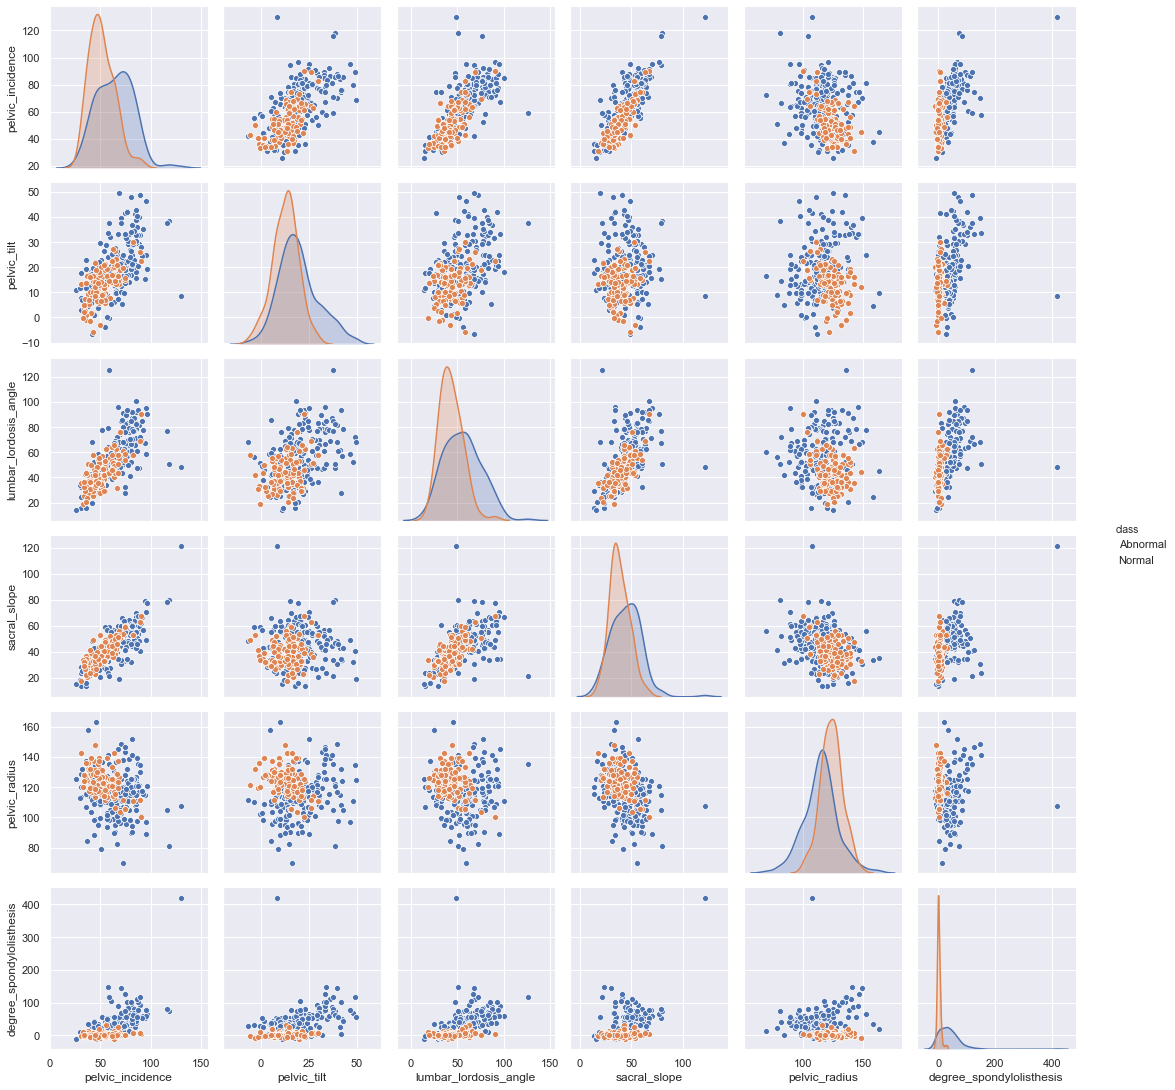

In [5]:
#i
#Make scatterplots of the independent variables in the dataset. Use color to
#show Classes 0 and 1.
# columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
# print(header_footer)
# print(half_line_space + " (b) i ")
arff_2C = arff.loadarff(column2C_path)
df = pd.DataFrame(arff_2C[0])
print(df)
ax = sns.pairplot(df, hue="class")


*********************************************************************************************************************
                                                       (b) ii 


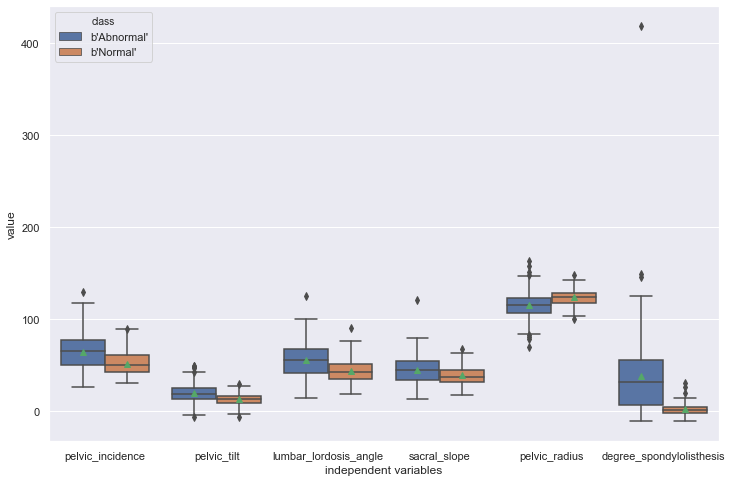

In [6]:
# (b) ii.
#Make boxplots for each of the independent variables. Use color to show
#Classes 0 and 1 (see ISLR p. 129)
print(header_footer)
print(half_line_space + " (b) ii ")
df_long = pd.melt(df, "class", var_name="independent variables", value_name="value")
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="independent variables", hue="class", y="value", data=df_long, showmeans=True)


In [7]:
# (b) iii Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
# training set and the rest of the data as the test set.

NORMAL = 0
ABNORMAL = 1
df = pd.DataFrame(arff_2C[0])

## CONVERT 'Normal' TO 0, 'Abnormal' TO 1
class_map = {b'Normal': 0, b'Abnormal': 1}
df = df.replace({'class': class_map})

## BREAK DATAFRAME INTO TRAIN/TEST SETS
df_normal = df.loc[df['class'] == NORMAL]
total_normal_rows = df_normal.shape[0]

train_normal = df_normal.head(70)
test_normal = df_normal.tail(total_normal_rows-70)

df_abnormal = df.loc[df['class'] == ABNORMAL]
train_abnormal = df_abnormal.head(140)

total_abnormal_rows = df_abnormal.shape[0]
test_abnormal = df_abnormal.tail(total_abnormal_rows-140)

train = pd.concat([train_normal, train_abnormal])
test = pd.concat([test_normal, test_abnormal])


*********************************************************************************************************************
                                                       (c) ii 
Legend
---------
Train: Orange
Test: Blue


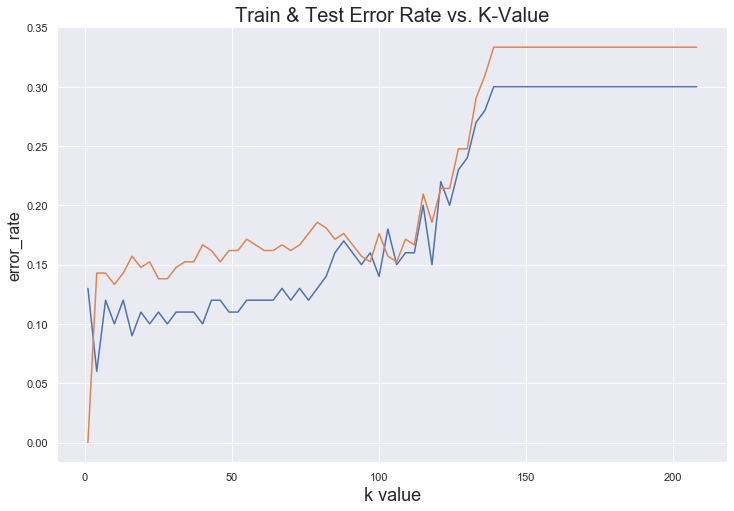

In [8]:
from sklearn.neighbors import KNeighborsClassifier
np_train = train.to_numpy()
np_test = test.to_numpy()
X=np_train[:,0:6]
Y=np_train[:,6]
np_test_input=np_test[:,0:6]
np_test_output = np_test[:,6]

k_values=[]
test_error_k=[]
train_error_k = []

## CALCULATING TEST ERROR
for k in range(208, 0, -3):
    k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    incorrect_count = 0
    model = knn.fit(X,Y)
    for i in range(0, len(np_test_input)):
        prediction = model.predict([np_test_input[i]])
        if np_test_output[i] != prediction:
            incorrect_count = incorrect_count+1
    test_error_k.append(incorrect_count/len(np_test_input))

## CALCULATING TRAIN ERROR
for k in range(208, 0, -3):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    incorrect_count = 0
    model = knn.fit(X,Y)
    for i in range(0, len(X)):
        prediction = model.predict([X[i]])
        if Y[i] != prediction:
            incorrect_count = incorrect_count+1
    train_error_k.append(incorrect_count/len(X))

print(header_footer)
print(half_line_space + " (c) ii ")
## Scatterplot error rate vs. K-value
print("Legend\n---------\nTrain: Orange\nTest: Blue")

plt.title("Train & Test Error Rate vs. K-Value", fontsize=20)
plt.xlabel('k value', fontsize=18)
plt.ylabel('error_rate', fontsize=16)
sns.lineplot(k_values, test_error_k)
sns.lineplot(k_values, train_error_k)
# plt.legend()

plt.show()



In [9]:
## FIND K*
print(header_footer)
print(half_line_space + " (c) ii cont'd ")
print("** Class 1 is the positive class ** \n")

euc_min_error = 1
test_k_star = -1
for i in range(0, len(test_error_k)):
    if test_error_k[i] < euc_min_error:
        euc_min_error = test_error_k[i]
        test_k_star = k_values[i]
    
train_k_star = -1
euc_min_error_train = 1
for i in range(0, len(train_error_k)):
    if train_error_k[i] < euc_min_error_train:
        euc_min_error_train = train_error_k[i]
        train_k_star = k_values[i]
        
# print(k_values)
# print(errors_each_k)
print("Euclidean (Test Data) ")

print("(Test) K* = " + str(test_k_star))
print("Error Rate: " + str(euc_min_error))


## CALCULATE CONFUSION MATRIX
## NORMAL = 0   (NEGATIVE)
## ABRNORMAL = 1   (POSITIVE)


knn = KNeighborsClassifier(n_neighbors=test_k_star)
model = knn.fit(X,Y)
calculate_confusion_matrix(model)

print("\n\nEuclidean (Train Data) ")


print("(Test) K* = " + str(test_k_star))
print("Error Rate: " + str(euc_min_error))


## CALCULATE CONFUSION MATRIX
## NORMAL = 0   (NEGATIVE)
## ABRNORMAL = 1   (POSITIVE)


knn = KNeighborsClassifier(n_neighbors=train_k_star)
model = knn.fit(X,Y)
calculate_confusion_matrix(model)

print(header_footer)

*********************************************************************************************************************
                                                       (c) ii cont'd 
** Class 1 is the positive class ** 

Euclidean (Test Data) 
(Test) K* = 4
Error Rate: 0.06

True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 0.83
Precision: 0.93
F1 Score: 0.96


Confusion Matrix 
   Neg  Pos
0   25    5
1    1   69


Euclidean (Train Data) 
(Test) K* = 4
Error Rate: 0.06

True Positive Rate (TPR): 0.96
True Negative Rate (TNR): 0.67
Precision: 0.87
F1 Score: 0.91


Confusion Matrix 
   Neg  Pos
0   20   10
1    3   67
*********************************************************************************************************************


*********************************************************************************************************************
                                                      (c) iii 


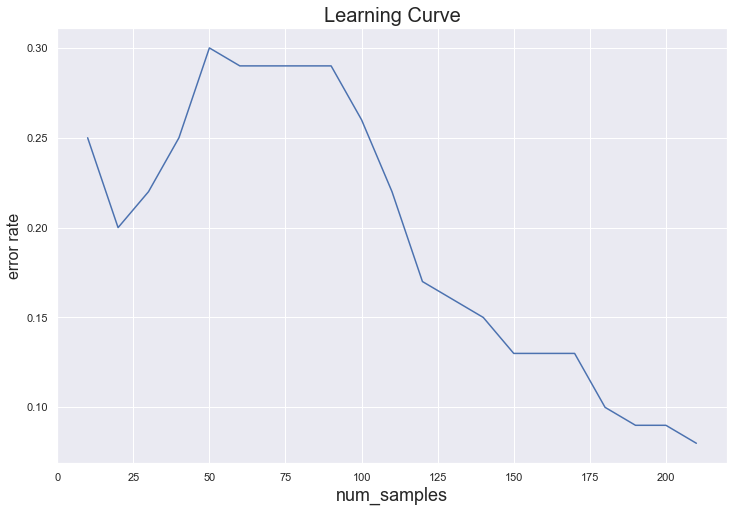

In [10]:
print(header_footer)
print(half_line_space + '(c) iii ')

num_samples = []
optimal_k = []
learning_curve_errs=[]
for n in range(10, 220, 10):
    num_samples.append(n)
    training_set = split_training_data(train, n)
    k_star, err = find_optimal_k(training_set, n, "euclidean", None, "uniform")
    if len(k_star) == 1:
        k_star = k_star[0]
    else:
        k_star = break_ties_optimal_k(k_star, training_set, n, "euclidean", None, 'uniform')
    learning_curve_errs.append(err)
    optimal_k.append(k_star)
#     print('optimal k* for ' + str(n) + ' is ' + str(k_star))

d = {'num_samples': num_samples, 'optimal_k': optimal_k}
df_size_k = pd.DataFrame(data=d)
# df_size_k = sns.load_dataset()
plt.figure()


sns.lineplot(x=num_samples, y=learning_curve_errs, data=df_size_k)
plt.title("Learning Curve", fontsize=20)
plt.xlabel('num_samples', fontsize=18)
plt.ylabel('error rate', fontsize=16)
plt.show()

In [11]:
## (d) i
print(header_footer)
print(half_line_space + "(d)iA.")
print("Minkowski")
mink_k_star, mink_min_error = find_optimal_k(train, 196, "minkowski", None, "uniform")
if len(mink_k_star) == 1:
    mink_k_star = mink_k_star[0]
else:
    mink_k_star = break_ties_optimal_k(mink_k_star, train, 196, "minkowski", None, 'uniform')
knn_mink = KNeighborsClassifier(n_neighbors=mink_k_star, metric="minkowski")
np_train = train.to_numpy()
np_test = test.to_numpy()
X=np_train[:,0:6]
Y=np_train[:,6]
mink_model = knn_mink.fit(X, Y)
print("K* = "+ str(mink_k_star))
print("Error Rate = "+ str(mink_min_error))

calculate_confusion_matrix(mink_model)

print('\n')
print("Manhattan")
man_k_star, man_min_error = find_optimal_k(train, 196, "manhattan", None, "uniform")
if len(man_k_star) == 1:
    man_k_star = man_k_star[0]
else:
    man_k_star = break_ties_optimal_k(man_k_star, train, 196, "manhattan", None, 'uniform')
print("K* = " + str(man_k_star))
print("Error Rate = " + str(man_min_error))
knn_man = KNeighborsClassifier(n_neighbors=man_k_star, metric="manhattan")
np_train = train.to_numpy()
np_test = test.to_numpy()
X=np_train[:,0:6]
Y=np_train[:,6]
man_model = knn_man.fit(X, Y)
calculate_confusion_matrix(man_model)
print(header_footer)



*********************************************************************************************************************
                                                      (d)iA.
Minkowski
K* = 6
Error Rate = 0.08

True Positive Rate (TPR): 1.00
True Negative Rate (TNR): 0.73
Precision: 0.90
F1 Score: 0.95


Confusion Matrix 
   Neg  Pos
0   22    8
1    0   70


Manhattan
K* = 11
Error Rate = 0.11

True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 0.67
Precision: 0.87
F1 Score: 0.93


Confusion Matrix 
   Neg  Pos
0   20   10
1    1   69
*********************************************************************************************************************


In [12]:

## (d) i B
## Find best log10(p) with log10(p) in {0.1, 0.2, 0.3, ... , 1.0} Using k* from Manhattan dist

print(header_footer)
print(half_line_space + "(d) iB. ")
log10p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 

log10p_errors=[]
for val in log10p:
    incorrect_count = 0
    knn_diB = KNeighborsClassifier(n_neighbors=man_k_star, metric="minkowski", p=10**val)
    diB_model = knn_diB.fit(X,Y)
    for i in range(0, len(np_test_input)):
        prediction = diB_model.predict([np_test_input[i]])
        if np_test_output[i] != prediction:
            incorrect_count = incorrect_count+1
    log10p_errors.append(incorrect_count/len(np_test_input))
        
# print(errors)
log10p_min_error = 1
best_log10p = -1
for i in range(0, len(log10p_errors)):
    if log10p_errors[i] < log10p_min_error:
        log10p_min_error = log10p_errors[i]
        best_log10p = log10p[i]



    
print("Best log10(p) is " + str(best_log10p))
print("Min error for log10(p) is " + str(log10p_min_error))
# print(log10p_errors)
knn_diB = KNeighborsClassifier(n_neighbors=6, metric="minkowski", p=10**best_log10p)
diB_model = knn_diB.fit(X,Y)
calculate_confusion_matrix(diB_model)
print(header_footer)


*********************************************************************************************************************
                                                      (d) iB. 
Best log10(p) is 0.1
Min error for log10(p) is 0.11

True Positive Rate (TPR): 0.97
True Negative Rate (TNR): 0.77
Precision: 0.91
F1 Score: 0.94


Confusion Matrix 
   Neg  Pos
0   23    7
1    2   68
*********************************************************************************************************************


In [13]:
## (d) i C
print(header_footer)
print(half_line_space + "(d) iC. ")
print('\n')
print("Chebyshev")
ch_k_star, ch_min_error = find_optimal_k(train, 196, "chebyshev", None, "uniform")
if len(ch_k_star) == 1:
    ch_k_star = ch_k_star[0]
else:
    ch_k_star = break_ties_optimal_k(ch_k_star, train, 196, "chebyshev", None, 'uniform')
print("K* = " + str(ch_k_star) + "\nMin Error = " + str(ch_min_error))
knn_ch = KNeighborsClassifier(n_neighbors=ch_k_star, metric="chebyshev")
ch_model = knn_ch.fit(X, Y)
calculate_confusion_matrix(ch_model)
print(header_footer)



*********************************************************************************************************************
                                                      (d) iC. 


Chebyshev
K* = 16
Min Error = 0.08

True Positive Rate (TPR): 1.00
True Negative Rate (TNR): 0.73
Precision: 0.90
F1 Score: 0.95


Confusion Matrix 
   Neg  Pos
0   22    8
1    0   70
*********************************************************************************************************************


In [14]:
## (d) ii
print(header_footer)
print(half_line_space + "(d) ii. ")
print("Mahalanobis")
mah_k_star, mah_min_error = find_optimal_k(train, 196, "mahalanobis", {'V': np.cov(X,rowvar=False)}, "uniform")
if len(mah_k_star) == 1:
    mah_k_star = mah_k_star[0]
else:
    mah_k_star = break_ties_optimal_k(mah_k_star, train, 196, "mahalanobis", {'V': np.cov(X,rowvar=False)}, 'uniform')
print("K* = " + str(mah_k_star) + "\nMin Error = " + str(mah_min_error))
knn_mah = KNeighborsClassifier(n_neighbors=6, metric="mahalanobis", metric_params={'V': np.cov(X,rowvar=False)})
mah_model = knn_mah.fit(X, Y)
calculate_confusion_matrix(mah_model)
print(header_footer)

*********************************************************************************************************************
                                                      (d) ii. 
Mahalanobis
K* = 1
Min Error = 0.15

True Positive Rate (TPR): 0.93
True Negative Rate (TNR): 0.63
Precision: 0.86
F1 Score: 0.89


Confusion Matrix 
   Neg  Pos
0   19   11
1    5   65
*********************************************************************************************************************


In [15]:
## (e) Weighted Voting
## Weighted Euclidean

print(header_footer)
print(half_line_space + "(e). ")
print("Weighted Euclidean")
weuc_k_star, weuc_min_error = find_optimal_k(train, 196, "euclidean", None, "distance")
if len(weuc_k_star) == 1:
    weuc_k_star = weuc_k_star[0]
else:
    weuc_k_star = break_ties_optimal_k(weuc_k_star, train, 196, "euclidean", None, 'distance')
print("K* = " + str(weuc_k_star) + "\nMin Error = " + str(weuc_min_error))

knn_weuc = KNeighborsClassifier(n_neighbors=weuc_k_star, metric="euclidean", weights="distance")
weuc_model = knn_weuc.fit(X, Y)

## Weighted Manhattan
print("\n\nWeighted Manhattan")
wman_k_star, wman_min_error = find_optimal_k(train, 196, "manhattan", None, "distance")
if len(wman_k_star) == 1:
    wman_k_star = wman_k_star[0]
else:
    wman_k_star = break_ties_optimal_k(wman_k_star, train, 196, "manhattan", None, 'distance')
print("K* = " + str(wman_k_star) + "\nMin Error = " + str(wman_min_error))
knn_wman = KNeighborsClassifier(n_neighbors=wman_k_star, metric="manhattan", weights="distance")
wman_model = knn_wman.fit(X, Y)


## Weighted Chebyshev
print("\n\nWeighted Chebyshev")
wch_k_star, wch_min_error = find_optimal_k(train, 196, "chebyshev", None, "distance")
if len(wch_k_star) == 1:
    wch_k_star = wch_k_star[0]
else:
    wch_k_star = break_ties_optimal_k(wch_k_star, train, 196, "chebyshev", None, 'distance')
print("K* = " + str(wch_k_star) + "\nMin Error = " + str(wch_min_error))
knn_wch = KNeighborsClassifier(n_neighbors=wch_k_star, metric="chebyshev", weights="distance")
wch_model = knn_wch.fit(X, Y)
print(header_footer)





*********************************************************************************************************************
                                                      (e). 
Weighted Euclidean
K* = 6
Min Error = 0.1


Weighted Manhattan
K* = 26
Min Error = 0.1


Weighted Chebyshev
K* = 16
Min Error = 0.11
*********************************************************************************************************************


In [16]:
## (f) Lowest Training Error Reported
print(header_footer)
print(half_line_space + "(f) ")
print("Lowest Training Error Reported is " + str(min(train_error_k)))
print(header_footer)

*********************************************************************************************************************
                                                      (f) 
Lowest Training Error Reported is 0.0
*********************************************************************************************************************
